# Data Visualization Project: Mental Health Disorder Analysis

This project focuses on cleaning and analyzing data related to mental health disorders across various countries. We will begin by loading the necessary libraries and the dataset, followed by data cleaning and extracting specific tables for detailed analysis.

In [106]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display
import os  # for file path management

# Setting plot styles
plt.style.use('ggplot')
sns.set(style="whitegrid")


## Step 1: Load and Explore the Data

In this step, we will load the dataset and perform initial explorations to understand its structure and contents.


In [107]:
# Load the data
file_path = '/home/icelero/Downloads/DataVIZ/DataSets/Mental health Depression disorder Data.csv'
df = pd.read_csv(file_path, low_memory=False)

# Display the first few rows of the dataframe
display(df.head())

# Summary statistics of the dataframe
display(df.describe())

# Display dataframe info
df.info()

# Display dataframe shape
print("DataFrame shape:", df.shape)

# Display dataframe columns
print("DataFrame columns:", df.columns)


,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


,index,Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,108553.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,54276.000000,3.989921,0.862278,3.497654,1.585821
std,31336.696223,1.167526,0.460679,0.655859,0.860283
min,0.000000,2.023393,0.383650,2.139903,0.446940
25%,27138.000000,3.188824,0.535064,3.005529,0.993685
50%,54276.000000,3.554373,0.726430,3.499606,1.479936
75%,81414.000000,4.682163,0.940157,3.912381,1.867834
max,108552.000000,8.967330,3.452476,6.602754,5.474668


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108553 entries, 0 to 108552
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      108553 non-null  int64  
 1   Entity                     108553 non-null  object 
 2   Code                       103141 non-null  object 
 3   Year                       108553 non-null  object 
 4   Schizophrenia (%)          25875 non-null   object 
 5   Bipolar disorder (%)       19406 non-null   object 
 6   Eating disorders (%)       100236 non-null  object 
 7   Anxiety disorders (%)      6468 non-null    float64
 8   Drug use disorders (%)     6468 non-null    float64
 9   Depression (%)             6468 non-null    float64
 10  Alcohol use disorders (%)  6468 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 9.1+ MB
DataFrame shape: (108553, 11)
DataFrame columns: Index(['index', 'Entity', 'Code', 'Ye

In this step, we will load the dataset and explore its initial structure to understand the data we are working with. The dataset used in this project is titled **"Global Trends in Mental Health Disorder"**. This dataset contains information about the prevalence of various mental health disorders in countries across the globe.

### About this dataset

- **Entity:** Unique identifier for each country or region included in the data set. (String)
- **Code:** Unique code associated with an Entity/Country or region included in the data set. (String)
- **Year:** Year that the data about that particular Entity/Country was collected. (Integer)
- **Schizophrenia (%):** Percentage of people with schizophrenia in that country/region during that year. (Float)
- **Bipolar disorder (%):** Percentage of people with bipolar disorder in that country/region during that year. (Float)
- **Eating disorders (%):** Percentage of people with eating disorders in that country/region during that year. (Float)
- **Anxiety disorders (%):** Percentage of people with anxiety disorders in that country/region during that year. (Float)
- **Drug use disorders (%):** Percentage of people with drug use disorders in that country/region during that year. (Float)
- **Depression (%):** Percentage of people with depression in that country/region during that year. (Float)
- **Alcohol use disorders (%):** Percentage of people with alcohol use disorders in that country/region during that year. (Float)

The dataset can be downloaded from [Kaggle](https://www.kaggle.com/datasets/thedevastator/uncover-global-trends-in-mental-health-disorder/versions/2).


## Step 2: Data Cleaning

In this step, we will rename the columns for better readability and handle any missing values present in the dataset.


In [108]:
# Renaming columns for better readability
df.rename(columns={
    'Entity': 'Country', 'Schizophrenia (%)': 'Schizophrenia', 
    'Bipolar disorder (%)': 'Bipolar_disorder', 'Eating disorders (%)': 'Eating_disorders', 
    'Anxiety disorders (%)': 'Anxiety_disorders', 'Drug use disorders (%)': 'Drug_use_disorders', 
    'Depression (%)': 'Depression', 'Alcohol use disorders (%)': 'Alcohol_use_disorders'
}, inplace=True)

# Remove unnecessary 'index' column if it exists
if 'index' in df.columns:
    df.drop('index', axis=1, inplace=True)
    
# Data type conversion
disorder_columns = ['Schizophrenia', 'Bipolar_disorder', 'Eating_disorders', 
                    'Anxiety_disorders', 'Drug_use_disorders', 'Depression', 
                    'Alcohol_use_disorders']
for col in disorder_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handling missing values by filling them with the mean of the column
percentage_columns = ['Schizophrenia', 'Bipolar_disorder', 'Eating_disorders',
                      'Anxiety_disorders', 'Drug_use_disorders', 'Depression', 'Alcohol_use_disorders']

for col in percentage_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handling missing values by filling them with the mean of the column
for col in percentage_columns:
    if df[col].isna().any():
        df[col].fillna(df[col].mean(), inplace=True)

# Check the new dataframe information
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108553 entries, 0 to 108552
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Country                108553 non-null  object 
 1   Code                   103141 non-null  object 
 2   Year                   108553 non-null  object 
 3   Schizophrenia          108553 non-null  float64
 4   Bipolar_disorder       108553 non-null  float64
 5   Eating_disorders       108553 non-null  float64
 6   Anxiety_disorders      108553 non-null  float64
 7   Drug_use_disorders     108553 non-null  float64
 8   Depression             108553 non-null  float64
 9   Alcohol_use_disorders  108553 non-null  float64
dtypes: float64(7), object(3)
memory usage: 8.3+ MB


(None,
        Country Code  Year  Schizophrenia  Bipolar_disorder  Eating_disorders   
 0  Afghanistan  AFG  1990       0.160560          0.697779          0.101855  \
 1  Afghanistan  AFG  1991       0.160312          0.697961          0.099313   
 2  Afghanistan  AFG  1992       0.160135          0.698107          0.096692   
 3  Afghanistan  AFG  1993       0.160037          0.698257          0.094336   
 4  Afghanistan  AFG  1994       0.160022          0.698469          0.092439   
 
    Anxiety_disorders  Drug_use_disorders  Depression  Alcohol_use_disorders  
 0           4.828830            1.677082    4.071831               0.672404  
 1           4.829740            1.684746    4.079531               0.671768  
 2           4.831108            1.694334    4.088358               0.670644  
 3           4.830864            1.705320    4.096190               0.669738  
 4           4.829423            1.716069    4.099582               0.669260  )

## Step 3: Extract and Clean Individual Tables

The dataset contains multiple columns representing different mental health disorders. We will extract each table for individual disorders, clean them separately, and prepare them for analysis.


In [109]:
# Specifying the row ranges for each table
range_table_1 = slice(0, 6468)
range_table_2 = slice(6469, 54276)
range_table_3 = slice(54277, 102084)
range_table_4 = slice(102085, len(df))  # From 102085 to the end

# Extracting each table into separate dataframes
table_1 = df.iloc[range_table_1].copy()
table_2 = df.iloc[range_table_2].copy()
table_3 = df.iloc[range_table_3].copy()
table_4 = df.iloc[range_table_4].copy()

# Clean and display each table
tables = [table_1, table_2, table_3, table_4]
for i, table in enumerate(tables):
    table.dropna(inplace=True)  # Remove rows with missing values
    display(table)


# Save each table to a CSV file
table_1.to_csv('/home/icelero/Downloads/DataVIZ/DataSets/CleanedMentalhealthDepressiondisorderData.csv', index=False)
table_2.to_csv('/home/icelero/Downloads/DataVIZ/DataSets/CleanedMentalHealthDisorderShareperSex.csv', index=False)
table_3.to_csv('/home/icelero/Downloads/DataVIZ/DataSets/CleanedSuicidalandDepressionshareper100kinhabits.csv', index=False)
table_4.to_csv('/home/icelero/Downloads/DataVIZ/DataSets/DepressiveDisordersper100kinhabits.csv', index=False)

,Country,Code,Year,Schizophrenia,Bipolar_disorder,Eating_disorders,Anxiety_disorders,Drug_use_disorders,Depression,Alcohol_use_disorders
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,Zimbabwe,ZWE,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470
6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751
6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


,Country,Code,Year,Schizophrenia,Bipolar_disorder,Eating_disorders,Anxiety_disorders,Drug_use_disorders,Depression,Alcohol_use_disorders
6469,Afghanistan,AFG,1800,1.101844e+06,1118.398074,3280000.0,3.989921,0.862278,3.497654,1.585821
6470,Afghanistan,AFG,1801,1.101844e+06,1118.398074,3280000.0,3.989921,0.862278,3.497654,1.585821
6471,Afghanistan,AFG,1802,1.101844e+06,1118.398074,3280000.0,3.989921,0.862278,3.497654,1.585821
6472,Afghanistan,AFG,1803,1.101844e+06,1118.398074,3280000.0,3.989921,0.862278,3.497654,1.585821
6473,Afghanistan,AFG,1804,1.101844e+06,1118.398074,3280000.0,3.989921,0.862278,3.497654,1.585821
...,...,...,...,...,...,...,...,...,...,...
54271,Zimbabwe,ZWE,2015,2.789152e+00,3.455323,13815000.0,3.989921,0.862278,3.497654,1.585821
54272,Zimbabwe,ZWE,2016,2.799308e+00,3.479071,14030000.0,3.989921,0.862278,3.497654,1.585821
54273,Zimbabwe,ZWE,2017,2.812022e+00,3.500860,14237000.0,3.989921,0.862278,3.497654,1.585821
54274,Zimbabwe,ZWE,2018,1.101844e+06,1118.398074,14439000.0,3.989921,0.862278,3.497654,1.585821


,Country,Code,Year,Schizophrenia,Bipolar_disorder,Eating_disorders,Anxiety_disorders,Drug_use_disorders,Depression,Alcohol_use_disorders
54277,Afghanistan,AFG,1800,1.101844e+06,1118.398074,3280000.0,3.989921,0.862278,3.497654,1.585821
54278,Afghanistan,AFG,1801,1.101844e+06,1118.398074,3280000.0,3.989921,0.862278,3.497654,1.585821
54279,Afghanistan,AFG,1802,1.101844e+06,1118.398074,3280000.0,3.989921,0.862278,3.497654,1.585821
54280,Afghanistan,AFG,1803,1.101844e+06,1118.398074,3280000.0,3.989921,0.862278,3.497654,1.585821
54281,Afghanistan,AFG,1804,1.101844e+06,1118.398074,3280000.0,3.989921,0.862278,3.497654,1.585821
...,...,...,...,...,...,...,...,...,...,...
102079,Zimbabwe,ZWE,2015,2.719706e+01,3068.250731,13815000.0,3.989921,0.862278,3.497654,1.585821
102080,Zimbabwe,ZWE,2016,2.683959e+01,3081.782858,14030000.0,3.989921,0.862278,3.497654,1.585821
102081,Zimbabwe,ZWE,2017,2.639177e+01,3094.795065,14237000.0,3.989921,0.862278,3.497654,1.585821
102082,Zimbabwe,ZWE,2018,1.101844e+06,1118.398074,14439000.0,3.989921,0.862278,3.497654,1.585821


,Country,Code,Year,Schizophrenia,Bipolar_disorder,Eating_disorders,Anxiety_disorders,Drug_use_disorders,Depression,Alcohol_use_disorders
102085,Afghanistan,AFG,1990,318435.813670,1118.398074,2.790313e+07,3.989921,0.862278,3.497654,1.585821
102086,Afghanistan,AFG,1991,329044.773956,1118.398074,2.790313e+07,3.989921,0.862278,3.497654,1.585821
102087,Afghanistan,AFG,1992,382544.572895,1118.398074,2.790313e+07,3.989921,0.862278,3.497654,1.585821
102088,Afghanistan,AFG,1993,440381.507393,1118.398074,2.790313e+07,3.989921,0.862278,3.497654,1.585821
102089,Afghanistan,AFG,1994,456916.645489,1118.398074,2.790313e+07,3.989921,0.862278,3.497654,1.585821
...,...,...,...,...,...,...,...,...,...,...
108548,Zimbabwe,ZWE,2013,303564.603590,1118.398074,2.790313e+07,3.989921,0.862278,3.497654,1.585821
108549,Zimbabwe,ZWE,2014,311665.769283,1118.398074,2.790313e+07,3.989921,0.862278,3.497654,1.585821
108550,Zimbabwe,ZWE,2015,320638.507158,1118.398074,2.790313e+07,3.989921,0.862278,3.497654,1.585821
108551,Zimbabwe,ZWE,2016,330437.353798,1118.398074,2.790313e+07,3.989921,0.862278,3.497654,1.585821


## Step 4: Data Visualizations

Let's visualize our data to uncover patterns and insights.

### Visualization 1: Mean Prevalence of Mental Disorders by Continent

We will visualize the mean prevalence of various mental disorders by continent to understand the geographic distribution of these disorders.


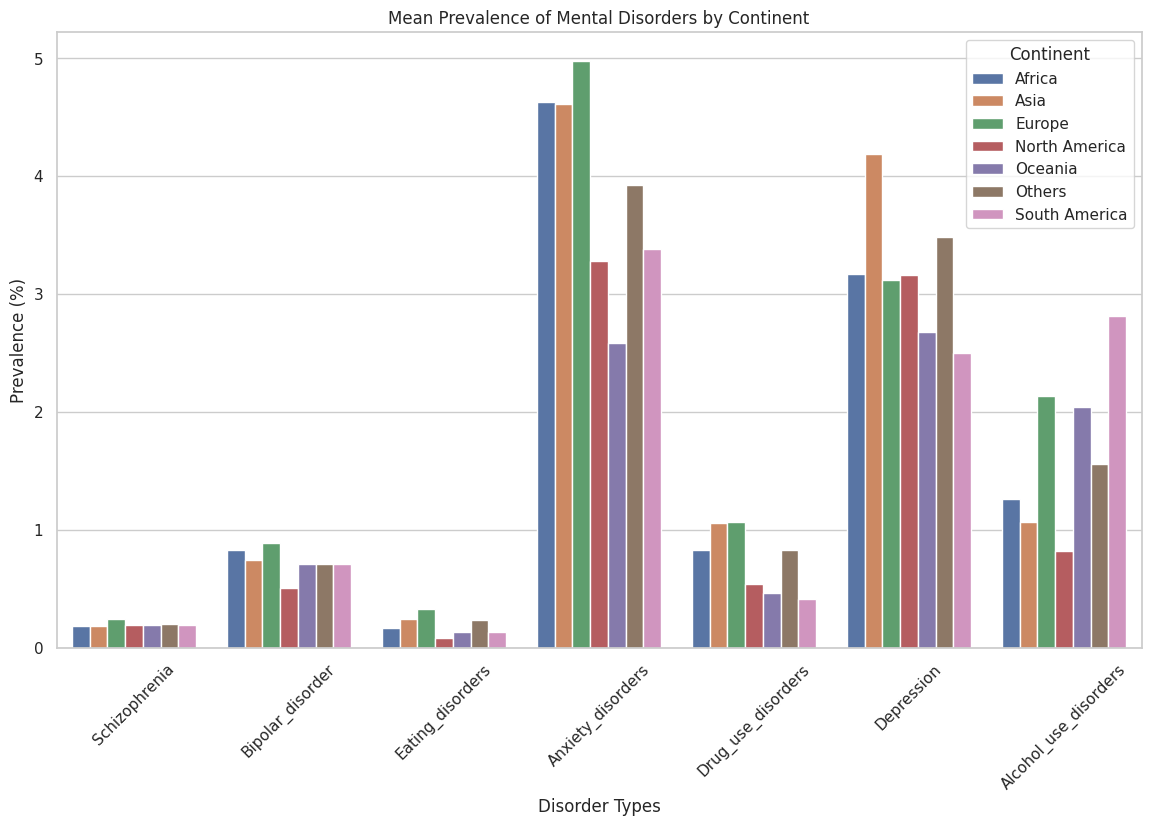

In [110]:
# Reading the CSV files
data1 = pd.read_csv('/home/icelero/Downloads/DataVIZ/DataSets/CleanedMentalhealthDepressiondisorderData.csv', index_col=False)
data2 = pd.read_csv('/home/icelero/Downloads/DataVIZ/DataSets/CleanedMentalHealthDisorderShareperSex.csv', index_col=False)
data3 = pd.read_csv('/home/icelero/Downloads/DataVIZ/DataSets/CleanedSuicidalandDepressionshareper100kinhabits.csv', index_col=False)
data4 = pd.read_csv('/home/icelero/Downloads/DataVIZ/DataSets/DepressiveDisordersper100kinhabits.csv', index_col=False)


# Mapping a few countries to continents for demonstration purposes
country_continent = {
    "Afghanistan": "Asia", "Albania": "Europe", "Algeria": "Africa", 
    "United States": "North America", "Canada": "North America",
    "Brazil": "South America", "India": "Asia", "China": "Asia",
    "Australia": "Oceania", "Germany": "Europe", "Russia": "Europe",
    "Nigeria": "Africa", "South Africa": "Africa"
}

# Assign continents to countries in the dataframe
table_1['Continent'] = data1['Country'].map(country_continent)

# Handle countries that aren't in the map (set them as 'Unknown' or drop them)
table_1['Continent'].fillna('Others', inplace=True)

# Now let's group the data by continent and compute the mean of disorders
continent_means = table_1.groupby('Continent')[['Schizophrenia', 'Bipolar_disorder', 'Eating_disorders', 
                                                'Anxiety_disorders', 'Drug_use_disorders', 'Depression', 
                                                'Alcohol_use_disorders']].mean().reset_index()

# Melt the dataframe for easier plotting with seaborn
continent_melted = continent_means.melt(id_vars=["Continent"], var_name="Disorder", value_name="Prevalence")

# Create a bar plot
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x="Disorder", y="Prevalence", hue="Continent", data=continent_melted)
plt.title('Mean Prevalence of Mental Disorders by Continent')
plt.ylabel('Prevalence (%)')
plt.xlabel('Disorder Types')
plt.xticks(rotation=45)
plt.legend(title='Continent')
plt.show()


## Visualization 2: Correlation Matrix for Disorders

We will calculate the correlation matrix for the disorders across all data in Dataset 2 and visualize this matrix using a heatmap to easily identify relationships.


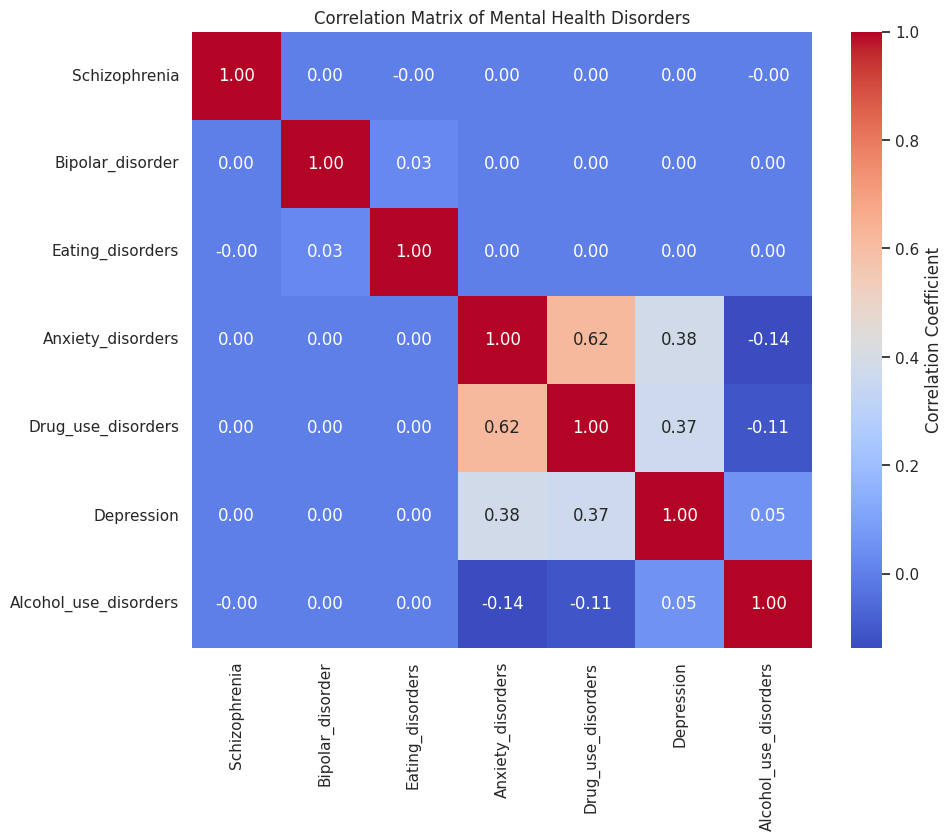

In [111]:
# Calculate the correlation matrix for the disorders
correlation_matrix = df[['Schizophrenia', 'Bipolar_disorder', 'Eating_disorders', 'Anxiety_disorders', 'Drug_use_disorders', 'Depression', 'Alcohol_use_disorders']].corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Mental Health Disorders')
plt.show()


## Viz 3: Global Trends in Mental Health Disorders

We will select a few key disorders to focus on, such as Depression, Anxiety disorders, and Schizophrenia, and plot the global trends for these disorders over the years available in the dataset.


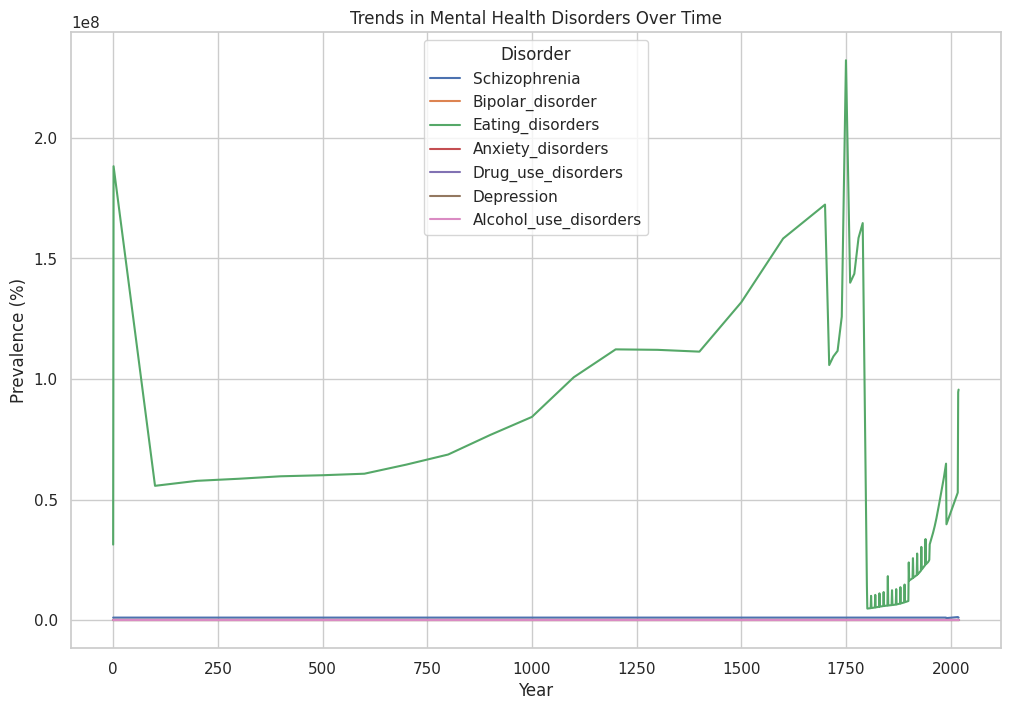

In [112]:
# Group the data by 'Year' and calculate the mean prevalence of depression per 100,000 inhabitants globally
global_depression_trends = data4.groupby('Year')['Depression'].mean()

# Ensuring 'Year' is an integer for plotting
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Dropping rows with NaN values in 'Year' after conversion (if any)
df.dropna(subset=['Year'], inplace=True)
df['Year'] = df['Year'].astype(int)

# Grouping data by year and calculating the mean of each disorder
annual_means = df.groupby('Year')[percentage_columns].mean()

# Plotting the trends over the years
plt.figure(figsize=(12, 8))
for column in percentage_columns:
    plt.plot(annual_means.index, annual_means[column], label=column)

plt.title('Trends in Mental Health Disorders Over Time')
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.legend(title='Disorder')
plt.grid(True)
plt.show()

In [113]:
data4.columns

Index(['Country', 'Code', 'Year', 'Schizophrenia', 'Bipolar_disorder',
       'Eating_disorders', 'Anxiety_disorders', 'Drug_use_disorders',
       'Depression', 'Alcohol_use_disorders'],
      dtype='object')

## Viz 4: Stacked Area Chart of Mental Health Disorders Trends

We will create a stacked area chart to visualize the trends of various mental health disorders over time. This chart will help us understand the changes in the prevalence of these disorders over the years.


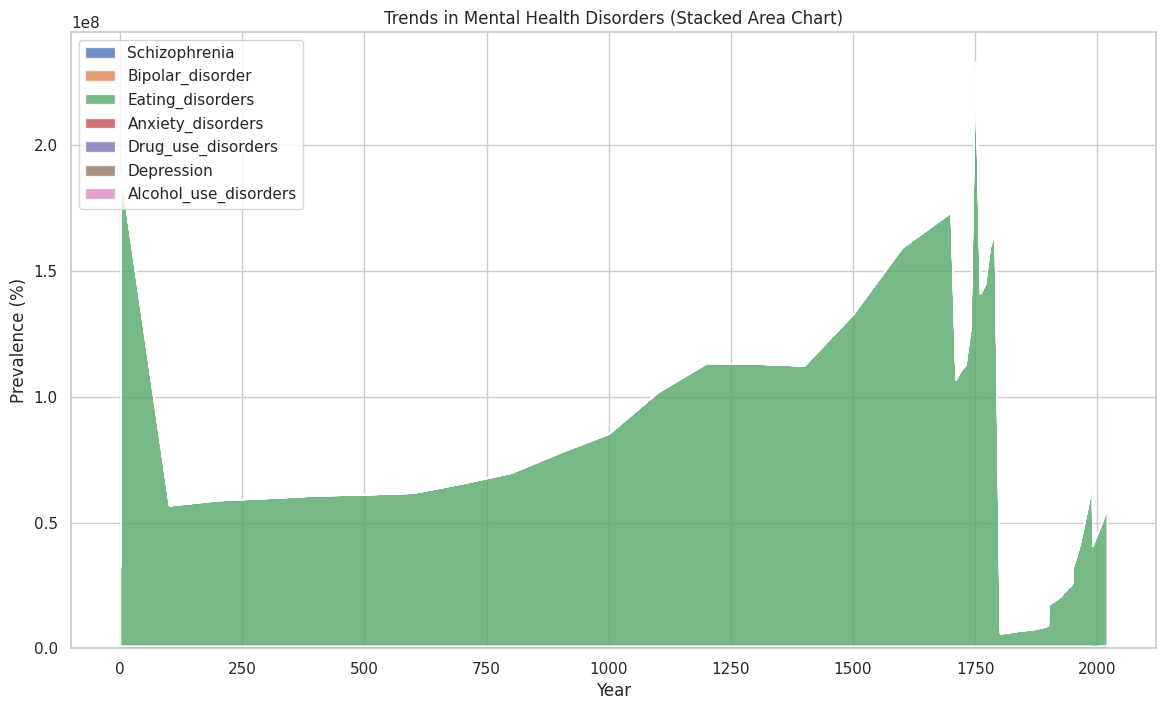

In [114]:

# Creating a stacked area chart to show the trends of disorders over time
plt.figure(figsize=(14, 8))
plt.stackplot(annual_means.index, annual_means['Schizophrenia'], annual_means['Bipolar_disorder'],
              annual_means['Eating_disorders'], annual_means['Anxiety_disorders'],
              annual_means['Drug_use_disorders'], annual_means['Depression'],
              annual_means['Alcohol_use_disorders'], labels=annual_means.columns,
              alpha=0.8)
plt.title('Trends in Mental Health Disorders (Stacked Area Chart)')
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.legend(loc='upper left')
plt.show()